<a href="https://colab.research.google.com/github/yeyiLee/ML_linear-regression/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Homework 4: Simple Linear Regression**

> **Student name:**  *(이예이)*

> **Student ID:** *(2018315065)*

### **1 - Data descripsion**

In this homework, we are going to work with the hourly/daily  weather dataset of Szeged, Hungary area, between 2006 and 2016. The dataset includes 11 columns as bellow:

* time
* summary
* precipType
* temperature
* apparentTemperature
* humidity
* windSpeed
* windBearing
* visibility
* loudCover
* pressure


First, you need to **upload** the  **weatherHistory.csv** file to your Google Drive in the folder **Colab Notebooks**

Then on the left  Tool bar, select **Files** $\rightarrow$ **Mount Drive**

Now, we read the data and see its columns.

In [ ]:
### read data
import os 
os.chdir ('/Users/liruiyi/projects/learning/nb/MLcourse')
import pandas as pd
data_frame = pd.read_csv('/Users/liruiyi/projects/learning/nb/MLcourse/weatherHistory.csv')
data_frame.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### **2 - Pre-process the data**

We assume that the **Visibility** is dependent on Precipitation Type,	Temperature,	Apparent Temperature,	Humidity,	Wind Speed,	Wind Bearing, and	Pressure. 

First, we drop unrelated variables. Then, encode the Precipitation Type of snow to 1 and raining to 0. Finally, split the data to input and target.

In [ ]:
sub_data_frame = data_frame.copy()

# Drop Summary, Loud Cover, and Daily Summary columns
sub_data_frame = sub_data_frame.drop(['Formatted Date', 'Summary', 'Loud Cover', 'Daily Summary'], axis=1)

# Encode the 'Precip Type' column
sub_data_frame['Precip Type'] = sub_data_frame['Precip Type'].apply(lambda x: 1 if x == 'snow' else 0)

 # Split the data into the input and target
data = sub_data_frame.drop('Visibility (km)', axis=1).copy()
target= sub_data_frame['Visibility (km)'].copy()
data.head()
target.head()
sub_data_frame.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


**Question 1.** Now, you are asked to split our data into training and test data by using scikit learn library, with the proportion of 75% training data and 25% of test data. *(10 points)*

In [ ]:
import numpy as np
np.random.seed(123)
y = target
X = data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

**Question 2.** Why do we need a training and test data to develope a machine learning model? *(10 points)*

> **Answer.** *(Training dats is to help the ML model to learn and make predictions, and the test data is used to check the level of prediction generated in the traning seciton.In order to increase the accuracy of the model,it is important to divide the data into train and test sets. Also,it will benefit the whole training process.)*

**Question 3.** Ussualy, we also have another set called validation data, you are free to search on the internet and write a short answer of your understanding about the validation data? *(5 points)*

> **Answer.** *(Sometimes, a dataset can be divided into three sub-sets. training data, test data, and validation data. The parameters generated from the validation data are always used to evaluate the model generated by traning data. This division are commonly seen in cross validation method)*

### **3 - Build a regression model**

**Question 4.** In this section, you are ask to
* Build a simple regression model from scikit learn library. *(25 points)*
* Predict and print out the error of the model on the test set. *(25 points)*

In [ ]:
# Create and fit the model
from sklearn.linear_model import LinearRegression
clf = LinearRegression ()
clf.fit (X_train, y_train)
predicted =  clf.predict (X_test)
expected =  y_test
# Predict and calculate the error of model on test set
rmse = np.sqrt(np.mean((expected - predicted) ** 2))
print("Root mean square error: {:.2f}".format(rmse))

Root mean square error: 3.73


**Question 5.** By checking the coefficients of the model, let us know what features have nagative or positive impact on the Visibility? *(25 points)*
> **Answer.** *(negative impact: Precipitation Type, Apparent Temperature, Humidity)
positive impact: Temperature, Wind Speed, Wind Bearing, and Pressure)*

Coefficient:{:.2f} [-2.38082608e+00  1.46834731e-01 -7.20576983e-02 -4.69494198e+00
  1.63399349e-02  1.30390773e-03  2.40270569e-03]


,Coefficient
Precip Type,-2.380826
Temperature (C),0.146835
Apparent Temperature (C),-0.072058
Humidity,-4.694942
Wind Speed (km/h),0.016340
Wind Bearing (degrees),0.001304
Pressure (millibars),0.002403


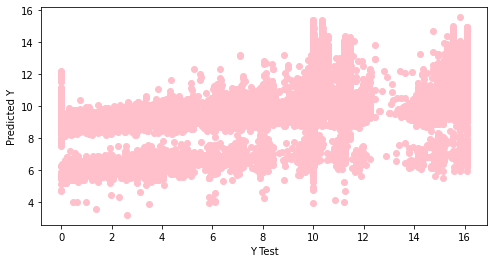

In [ ]:
# print the coefficient
print ('Coefficient:{:.2f}',clf.coef_)


# plot of predicted and expected visibility 
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.scatter(expected, predicted, color="pink")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#made a coefficient matrix
cf = pd.DataFrame(clf.coef_,X.columns)
cf.columns = ['Coefficient']
cf

In [ ]:
# Answer
variable = ['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']
cf = [ -2.380826,0.146835, -0.072058, -4.694942, 0.016340, 0.001304,0.002403]
for v in range (len(variable)):
    if  cf[v] < 0:
        print ('{} has a negaitve effect on visibility'.format(variable[v]))
    elif cf[v] > 0:
        print ('{} has a positive effect on visibility'.format(variable[v]))
    else:
         print ('{} has no effect on visibility'.format(variable[v]))

Precip Type has a negaitve effect on visibility
Temperature (C) has a positive effect on visibility
Apparent Temperature (C) has a negaitve effect on visibility
Humidity has a negaitve effect on visibility
Wind Speed (km/h) has a positive effect on visibility
Wind Bearing (degrees) has a positive effect on visibility
Pressure (millibars) has a positive effect on visibility


### **Submission.** 
After finish all the questions, to create a submission file: on the top tool bar, select **File** $\rightarrow$ **Print**, at **Detination** select **Save as PDF**. \\
Finally, **only upload your PDF file on iCampus.**